In [27]:
# Importer les packages nécéssaires
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances,manhattan_distances
from scipy.spatial.distance import correlation
import seaborn as sns
import matplotlib.pyplot as plt
print("Importer les packages nécéssaires")

Importer les packages nécéssaires


In [32]:
data = pd.read_csv("Mall_Customers.csv", sep=";", encoding="utf-8-sig")
data.columns = (
    data.columns.str.replace("\ufeff", "", regex=True)
                    .str.strip()
)
print("read data and Nettoyer les noms de colonnes (espaces, BOM)")

read data and Nettoyer les noms de colonnes (espaces, BOM)


In [35]:
print("Les 5 premières lignes du jeu de données :")
display(data.head())  # ou data.head()

# Afficher les 5 dernières lignes (tail)
print("\nLes 5 dernières lignes du jeu de données :")
display(data.tail())  # ou data.tail()

Les 5 premières lignes du jeu de données :


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Les 5 dernières lignes du jeu de données :


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [38]:
# Variables quantitatives utiles (on exclut CustomerID qui est un identifiant)
num_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
data_q = data[num_cols].copy()
print(data_q.shape)
data_q.head()

(200, 3)


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [40]:
# Multiplie chaque valeur de la colonne 'Annual Income (k$)' par 100
data["Annual Income ($)"] = data["Annual Income (k$)"] * 100  

# Affiche les 5 premières lignes pour vérifier le changement
print(data[["Annual Income (k$)", "Annual Income ($)"]].head())

   Annual Income (k$)  Annual Income ($)
0                  15               1500
1                  15               1500
2                  16               1600
3                  16               1600
4                  17               1700


In [41]:
# Affiche les 5 premières lignes
print("Les 5 premières lignes :")
print(data.head())

# Affiche les 5 dernières lignes
print("\nLes 5 dernières lignes :")
print(data.tail())

Les 5 premières lignes :
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Annual Income ($)  
0               1500  
1               1500  
2               1600  
3               1600  
4               1700  

Les 5 dernières lignes :
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137              

In [47]:
dist_euc = euclidean_distances(data_q)
# Affiche les 5 premières distances pour vérification
print(dist_euc[:5, :5])

[[ 0.         42.04759208 33.03028913 38.22302971 12.20655562]
 [42.04759208  0.         75.01333215  4.58257569 42.24926035]
 [33.03028913 75.01333215  0.         71.06335202 35.74912586]
 [38.22302971  4.58257569 71.06335202  0.         37.86819246]
 [12.20655562 42.24926035 35.74912586 37.86819246  0.        ]]


In [48]:
dist_man = manhattan_distances(data_q)
print(dist_man[:5, :5])

[[ 0. 44. 35. 43. 15.]
 [44.  0. 77.  7. 53.]
 [35. 77.  0. 74. 46.]
 [43.  7. 74.  0. 46.]
 [15. 53. 46. 46.  0.]]


In [52]:
scaler = MinMaxScaler()
data_n = pd.DataFrame(scaler.fit_transform(data_q), columns=data_q.columns)
print(data_n.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959


In [55]:
# Recalculer les distances sur les données normalisées
dist_euc_norm = euclidean_distances(data_n)
dist_man_norm = manhattan_distances(data_n)
print("Distance euclidienne (norm) :\n", dist_euc_norm[:5, :5])
print("\nDistance de Manhattan (norm) :\n", dist_man_norm[:5, :5])

Distance euclidienne (norm) :
 [[0.         0.43029381 0.33738296 0.39539647 0.2315757 ]
 [0.43029381 0.         0.76559158 0.05667847 0.46074096]
 [0.33738296 0.76559158 0.         0.72678323 0.40642616]
 [0.39539647 0.05667847 0.72678323 0.         0.40777518]
 [0.2315757  0.46074096 0.40642616 0.40777518 0.        ]]

Distance de Manhattan (norm) :
 [[0.         0.46703297 0.36416218 0.4728749  0.25736676]
 [0.46703297 0.         0.79273361 0.08747459 0.62706848]
 [0.36416218 0.79273361 0.         0.7821821  0.56667396]
 [0.4728749  0.08747459 0.7821821  0.         0.5395939 ]
 [0.25736676 0.62706848 0.56667396 0.5395939  0.        ]]


In [56]:
# 11) Similarité cosinus (entre clients) sur données normalisées
cos_sim = cosine_similarity(data_n)
print(cos_sim[:5, :5])  # aperçu

[[1.         0.99977948 0.82063566 0.99722288 0.87155643]
 [0.99977948 1.         0.83215373 0.99855134 0.88163422]
 [0.82063566 0.83215373 1.         0.86076814 0.99212071]
 [0.99722288 0.99855134 0.86076814 1.         0.90556096]
 [0.87155643 0.88163422 0.99212071 0.90556096 1.        ]]


In [57]:
# 12) Similarité de corrélation de Pearson (entre clients)
sim_corr = np.corrcoef(data_n, rowvar=True)
print(sim_corr[:5, :5])

[[1.         0.99981285 0.75580656 0.99814573 0.82052932]
 [0.99981285 1.         0.76833288 0.99913652 0.83143411]
 [0.75580656 0.76833288 1.         0.79426212 0.99444515]
 [0.99814573 0.99913652 0.79426212 1.         0.85380111]
 [0.82052932 0.83143411 0.99444515 0.85380111 1.        ]]


In [58]:
# Comparaison visuelle des matrices
print("Comparaison : Distance Euclidienne vs Similarité Cosinus")
print("Euclidienne (premières valeurs):\n", dist_euc_norm[:5, :5])
print("\nCosinus (premières valeurs):\n", cos_sim[:5, :5])

Comparaison : Distance Euclidienne vs Similarité Cosinus
Euclidienne (premières valeurs):
 [[0.         0.43029381 0.33738296 0.39539647 0.2315757 ]
 [0.43029381 0.         0.76559158 0.05667847 0.46074096]
 [0.33738296 0.76559158 0.         0.72678323 0.40642616]
 [0.39539647 0.05667847 0.72678323 0.         0.40777518]
 [0.2315757  0.46074096 0.40642616 0.40777518 0.        ]]

Cosinus (premières valeurs):
 [[1.         0.99977948 0.82063566 0.99722288 0.87155643]
 [0.99977948 1.         0.83215373 0.99855134 0.88163422]
 [0.82063566 0.83215373 1.         0.86076814 0.99212071]
 [0.99722288 0.99855134 0.86076814 1.         0.90556096]
 [0.87155643 0.88163422 0.99212071 0.90556096 1.        ]]


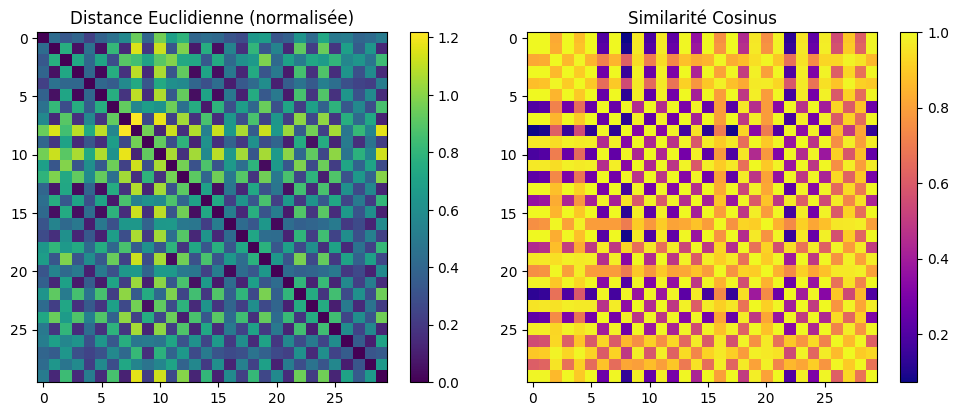

In [59]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(dist_euc_norm[:30, :30], cmap="viridis")
plt.title("Distance Euclidienne (normalisée)")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(cos_sim[:30, :30], cmap="plasma")
plt.title("Similarité Cosinus")
plt.colorbar()

plt.tight_layout()
plt.show()